# Finding a formula to fit Wilks coefficients

The Wilks coefficients are used to compare the weights lifted by athletes of varying body weight. The weight lifted is multiplied by a coefficient according to the body weight. The higher the product, the better the athlete has performed.

Unfortunately, the creator of the formula, Robert Wilks, CEO of Powerlifting Australia, hasn't published the formula on which the coefficients are based on. Only two tables of coefficients are [available](https://powerliftingaustralia.com/wilks-formula/), one for men, one for women.

The following code extracts the coefficients from those tables (see the files wilks-men.tsv and wilks-women.tsv) and fits a reciprocal polynomial on them.

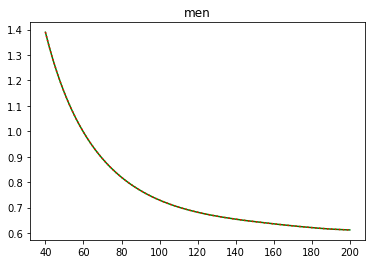

[ 3.63670138e+04  6.55937783e+03  5.65741690e+01 -1.07472551e+00
  5.45052301e-03 -9.30455617e-06  4.63384381e+05]


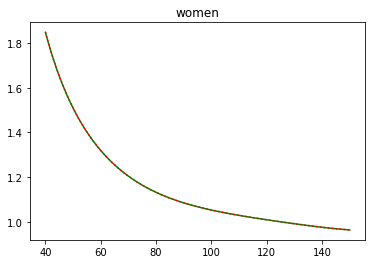

[-9.31498570e+04  1.01904268e+04 -2.43239016e+01 -7.84945613e-01
  7.00489691e-03 -1.74074520e-05  4.46372497e+05]


In [182]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

p0 = {
    'men': (-216.0475144, 16.2606339, -0.002388645, -0.00113732, 7.01863e-6, -1.291e-8, 1000),
    'women': (594.31747775582, -27.23842536447, 0.82112226871, -0.00930733913, 4.731582e-5, -9.054e-8, 1000)
}

def wilks(x, a, b, c, d, e, f, g):
    return g / (a + b * x + c * x**2 + d * x**3 + e * x**4 + f * x**5)

def optimize(sex: str) -> ():
    csv = pd.read_csv(f'wilks-{sex}.tsv', delimiter='\t')
    bwt = csv['BWT'].values
    coeff = csv['0'].values
    popt, pcov = curve_fit(wilks, bwt, coeff, p0=p0[sex])
    x = np.arange(bwt[0], bwt[-1] + 1, 1)
    y = wilks(x, *popt)
    fig, ax = plt.subplots()
    ax.set_title(sex)
    plt.plot(bwt, coeff, 'g-', x, wilks(x, *popt), 'r:')
    plt.show()
    return popt

for sex in ['men', 'women']:
    param = optimize(sex)
    print(param)
